In [2]:
from keras.layers import Input, Dense, Activation, Dropout, LeakyReLU, Lambda, PReLU
from keras.models import Model, Sequential, model_from_json
from keras.callbacks import EarlyStopping
from keras import optimizers, activations, regularizers
from keras import backend as K
from sklearn.model_selection import train_test_split, KFold
from numpy import loadtxt
from keras.models import load_model, model_from_json
from keras.backend import sigmoid
from keras.utils.generic_utils import get_custom_objects
import json
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

Using TensorFlow backend.


In [3]:
class Swish(Activation):
    
    def __init__(self, activation, **kwargs):
        super(Swish, self).__init__(activation, **kwargs)
        self.__name__ = 'swish'

def swish(x):
    return (sigmoid(x) * x)

get_custom_objects().update({'swish': Swish(swish)})

## NN autoencoder 

In [11]:
'''NN to NN 10'''
with open('/Users/maggiezhang/Dropbox/AtmosphereMachineLearning/DensityData/Models/nntonn10.json','r') as f:
    model_encoder_json = json.load(f)
    model_encoder_json = json.dumps(model_encoder_json)
    model_encoder_json = str(model_encoder_json)

model_encoder1 = model_from_json(model_encoder_json)
model_encoder1.load_weights('/Users/maggiezhang/Dropbox/AtmosphereMachineLearning/DensityData/Models/nntonn10.h5')
model_encoder1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24, 20, 36, 1)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 24, 1, 36, 12)     252       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5111)              52995959  
_________________________________________________________________
batch_normalization_1 (Batch (None, 5111)              20444     
_________________________________________________________________
dense_2 (Dense)              (None, 2519)              12877128  
_________________________________________________________________
batch_normalization_2 (Batch (None, 2519)              1007

In [13]:
encoder_model_nn = Model(inputs=model_encoder1.input, outputs=model_encoder1.layers[21].output)
encoder_model_nn.summary()

decode_input1 = Input(model_encoder1.layers[22].input_shape[1:])
decoder_model_nn = decode_input1
for layer in model_encoder1.layers[22:]:
    decoder_model_nn = layer(decoder_model_nn)
decoder_model_nn = Model(inputs=decode_input1, outputs=decoder_model_nn)

decoder_model_nn.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24, 20, 36, 1)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 24, 1, 36, 12)     252       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5111)              52995959  
_________________________________________________________________
batch_normalization_1 (Batch (None, 5111)              20444     
_________________________________________________________________
dense_2 (Dense)              (None, 2519)              12877128  
_________________________________________________________________
batch_normalization_2 (Batch (None, 2519)              1007

## CNN autoencoder

In [9]:
'''CNN to NN 45'''
with open('/Users/maggiezhang/Dropbox/AtmosphereMachineLearning/DensityData/Models/1x1final12.json','r') as f:
    model_encoder_json = json.load(f)
    model_encoder_json = json.dumps(model_encoder_json)
    model_encoder_json = str(model_encoder_json)

model_encoder = model_from_json(model_encoder_json)
#weights =h5py.File('/Users/maggiezhang/Desktop/1x1filter120.h5', 'r')
model_encoder.load_weights('/Users/maggiezhang/Desktop/1x1filter120.h5')
model_encoder.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24, 20, 36, 1)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 24, 20, 1, 795)    29415     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 20, 1, 795)    96        
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 24, 1, 1, 204)     3243804   
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 1, 1, 204)     96        
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 1, 1, 934)      4573798   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 1, 1, 934)      4   

In [11]:
encoder_model_cnn = Model(inputs=model_encoder.input, outputs=model_encoder.layers[8].output)
encoder_model_cnn.summary()

decode_input = Input(model_encoder.layers[9].input_shape[1:])
decoder_model_cnn = decode_input
for layer in model_encoder.layers[9:]:
    decoder_model_cnn = layer(decoder_model_cnn)
decoder_model_cnn = Model(inputs=decode_input, outputs=decoder_model_cnn)

decoder_model_cnn.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24, 20, 36, 1)     0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 24, 20, 1, 795)    29415     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 20, 1, 795)    96        
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 24, 1, 1, 204)     3243804   
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 1, 1, 204)     96        
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 1, 1, 934)      4573798   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 1, 1, 934)      4   

In [26]:
'''Open NN Model (not very relevant bc is retrained later )'''
with open('/Users/maggiezhang/Desktop/2019-2020/atmosphereModel/NeuralNetworkCode/Models/recurrent_model.json','r') as f:
    model_NN_json = json.load(f)
    model_NN_json = json.dumps(model_NN_json)
    model_NN_json = str(model_NN_json)

model_NN = model_from_json(model_NN_json)
model_NN.load_weights('/Users/maggiezhang/Desktop/2019-2020/atmosphereModel/NeuralNetworkCode/Models/recurrent_model.h5')
model_NN.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 120)               4680      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 120)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 40)                4840      
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 40)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 20)                820       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [9]:
"""Load data for full NN architecture"""
years = 12
base_year = 1997

data_header = "/Users/maggiezhang/Dropbox/AtmosphereMachineLearning/DensityData/"
full_sw = scipy.io.loadmat(data_header+"SWdata_NRLMSISE_1997_2008_smooth.mat")

data0 = scipy.io.loadmat(data_header+"1997_NRLMSISE_smoothSW_density.mat")
data1 = scipy.io.loadmat(data_header+"1998_NRLMSISE_smoothSW_density.mat")
data2 = scipy.io.loadmat(data_header+"1999_NRLMSISE_smoothSW_density.mat")
data3 = scipy.io.loadmat(data_header+"2000_NRLMSISE_smoothSW_density.mat")
data4 = scipy.io.loadmat(data_header+"2001_NRLMSISE_smoothSW_density.mat")
data5 = scipy.io.loadmat(data_header+"2002_NRLMSISE_smoothSW_density.mat")
data6 = scipy.io.loadmat(data_header+"2003_NRLMSISE_smoothSW_density.mat")
data7 = scipy.io.loadmat(data_header+"2004_NRLMSISE_smoothSW_density.mat")
data8 = scipy.io.loadmat(data_header+"2005_NRLMSISE_smoothSW_density.mat")
data9 = scipy.io.loadmat(data_header+"2006_NRLMSISE_smoothSW_density.mat")
data10 = scipy.io.loadmat(data_header+"2007_NRLMSISE_smoothSW_density.mat")
data11 = scipy.io.loadmat(data_header+"2008_NRLMSISE_smoothSW_density.mat")


''' for i in range(years):
    file_name_density = str(base_year+i) + "_NRLMSISE_smoothSW_density.mat"
    print(data_header+file_name_density)
    #file_name_SW = str(base_year+i) + "_JB2008_sw.mat"
    dens = scipy.io.loadmat(data_header+file_name_density)
    if i == 0:
        full_dens = dens['densityData']
    else:
        full_dens = np.column_stack((full_dens, dens['densityData']))
        print(full_dens.shape)

    sw = scipy.io.loadmat(data_header+file_name_SW)
    if i == 0:
        full_sw = sw['SWdata']
    else:
        full_sw = np.concatenate((full_sw, sw['SWdata']))
        print(full_sw.shape)
        to_save = {"density": full_dens, "sw": full_sw}
scipy.io.savemat("12_years_JB_Full", to_save)
'''

' for i in range(years):\n    file_name_density = str(base_year+i) + "_NRLMSISE_smoothSW_density.mat"\n    print(data_header+file_name_density)\n    #file_name_SW = str(base_year+i) + "_JB2008_sw.mat"\n    dens = scipy.io.loadmat(data_header+file_name_density)\n    if i == 0:\n        full_dens = dens[\'densityData\']\n    else:\n        full_dens = np.column_stack((full_dens, dens[\'densityData\']))\n        print(full_dens.shape)\n\n    sw = scipy.io.loadmat(data_header+file_name_SW)\n    if i == 0:\n        full_sw = sw[\'SWdata\']\n    else:\n        full_sw = np.concatenate((full_sw, sw[\'SWdata\']))\n        print(full_sw.shape)\n        to_save = {"density": full_dens, "sw": full_sw}\nscipy.io.savemat("12_years_JB_Full", to_save)\n'

In [10]:
xdata = np.concatenate((data0['densityData'].T, data1['densityData'].T,
                        data2['densityData'].T, data3['densityData'].T,
                        data4['densityData'].T, data5['densityData'].T,
                        data6['densityData'].T, data7['densityData'].T,
                        data8['densityData'].T, data9['densityData'].T,
                        data10['densityData'].T, data11['densityData'].T))
xdata = xdata.astype('float32')
np.save("NRLMSISE_concat_data.npy", xdata)
xdata_1 = np.log10(xdata)
xmat = (xdata_1 - np.mean(xdata_1, keepdims=True)) / np.std(xdata_1, keepdims=True)
xmat = np.reshape(xmat, (105192, 24, 20, 36, 1))
#np.save("NRLMSISE_concat_log_standard.npy", xmat)

KeyboardInterrupt: 

In [7]:
xdata= np.load("NRLMSISE_concat_data.npy")
xdata_1 = np.log10(xdata)
xmat = (xdata_1 - np.mean(xdata_1, keepdims=True)) / np.std(xdata_1, keepdims=True)
xmat = np.reshape(xmat, (105192, 24, 20, 36, 1))

In [8]:
full_sw = scipy.io.loadmat("/Users/maggiezhang/Dropbox/AtmosphereMachineLearning/DensityData/SWdata_NRLMSISE_1997_2008_smooth.mat")
localSolarTimes = np.linspace(0,24,24)
latitudes = np.linspace(-87.5,87.5,20)
altitudes = np.linspace(100,800,36)
nofAlt = len(altitudes)
nofLst = len(localSolarTimes)
nofLat = len(latitudes)
spacewData = full_sw['SWdataFullSmooth']

In [2]:
densityDataVarLog = np.log10(xdata) - np.reshape(np.log10(np.mean(xdata, axis = 1)), (105192, 1))
u,d,v = np.linalg.svd(densityDataVarLog)
np.save("NRLMSISE_u.npy", u)

hello


In [53]:
swmat = sw['SWdata']
swtest = swmat[:-1,:]
swappend = swmat[1:,:]
swtest= np.concatenate((swtest, swappend), axis=1)
X1_lin = X1.T
Lin_NN_Data = np.concatenate((X1_lin, swtest), axis=1)
print(Lin_NN_Data.shape)
Lin_NN_predict = model_NN.predict(Lin_NN_Data).T

print(Lin_NN_predict.shape)
densityVarRomPred= np.matmul(u[:,:r], Lin_NN_predict)
print(densityVarRomPred.shape)
matrixof10 = np.full((17280, 8783), 10)
densityRomPred = np.power(matrixof10,(densityVarRomPred+densityDataMeanLog))
xdata = dens['densityData'].T
xdata=xdata.astype('float32')
actual_ROM = xdata[1:,:].T

print(actual_ROM.shape)
squared_ROM = np.sum(np.square(densityRomPred-actual_ROM))/(actual_ROM.shape[0]*actual_ROM.shape[1])
print(squared_ROM)



(8759, 38)
(10, 8759)
(17280, 8759)


ValueError: operands could not be broadcast together with shapes (17280,8783) (17280,8759) 

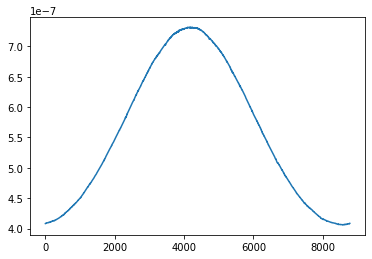

In [11]:
plt.figure()
plt.plot(actual_ROM[0])

## Autoencoder Method 

In [9]:
swmat = spacewData
swtest = swmat[:-1,:]
swappend = swmat[1:,:]
swtest= np.concatenate((swtest, swappend), axis=1)
print(swtest.shape)

(105191, 22)


In [13]:
"""Encoding data"""
rom_predict = encoder_model_cnn.predict(xmat)

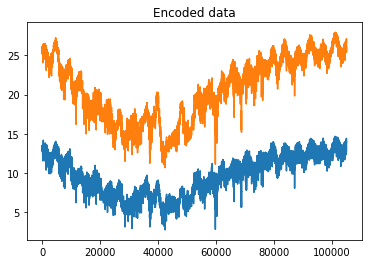

In [11]:
plt.figure()
plt.title("Encoded data")
plt.plot(rom_predict[:,0])
plt.plot(rom_predict[:,9])

In [14]:
"""Creating NN Training Data in nn model"""
x_vals = rom_predict[:-1,]
x_vals = np.concatenate((x_vals, swtest), axis=1)
y_vals = rom_predict[1:,]
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.15, random_state = 42)
x_t, x_val, y_t, y_val = train_test_split(x_train, y_train, test_size=0.17647)

In [15]:
"""Retrain NN for nn model"""
model = Sequential()
model.add(Dense(80, kernel_initializer='random_uniform'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(40, kernel_initializer='random_uniform'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(20, kernel_initializer='random_uniform'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(10, kernel_initializer='random_uniform'))
ad = optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=ad, loss='mse', metrics=['accuracy'])
history = model.fit(x = x_t, y = y_t, validation_data = (x_val, y_val), epochs = 500, batch_size = 32) #, callbacks=[early_stop])


Train on 73633 samples, validate on 15779 samples
Epoch 1/500
73633/73633 [==============================] - 2s 29us/step - loss: 9.7409 - accuracy: 0.9822 - val_loss: 0.1606 - val_accuracy: 1.0000
Epoch 2/500
73633/73633 [==============================] - 2s 27us/step - loss: 0.1529 - accuracy: 1.0000 - val_loss: 0.1892 - val_accuracy: 1.0000
Epoch 3/500
73633/73633 [==============================] - 2s 27us/step - loss: 0.1480 - accuracy: 1.0000 - val_loss: 0.1540 - val_accuracy: 1.0000
Epoch 4/500
73633/73633 [==============================] - 2s 27us/step - loss: 0.1392 - accuracy: 1.0000 - val_loss: 0.1797 - val_accuracy: 1.0000
Epoch 5/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.1118 - accuracy: 1.0000 - val_loss: 0.1456 - val_accuracy: 1.0000
Epoch 6/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0786 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 1.0000
Epoch 7/500
73633/73633 [==============================] - 2s 

Epoch 56/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 57/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 58/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 59/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 60/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 61/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 62/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0051 - accuracy: 1.0000

Epoch 111/500
73633/73633 [==============================] - 2s 25us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 112/500
73633/73633 [==============================] - 2s 25us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 113/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 114/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 115/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 116/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 117/500
73633/73633 [==============================] - 2s 25us/step - loss: 0.0032 - accuracy:

Epoch 220/500
73633/73633 [==============================] - 2s 25us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 221/500
73633/73633 [==============================] - 2s 25us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 222/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 223/500
73633/73633 [==============================] - 2s 25us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 224/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 225/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 226/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0019 - accuracy:

73633/73633 [==============================] - 2s 25us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 329/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 330/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 331/500
73633/73633 [==============================] - 2s 25us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 332/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 333/500
73633/73633 [==============================] - 2s 25us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 334/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0015 - accuracy: 1.0000 - val_

73633/73633 [==============================] - 2s 26us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 437/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 438/500
73633/73633 [==============================] - 2s 25us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 439/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 440/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 441/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 442/500
73633/73633 [==============================] - 2s 26us/step - loss: 0.0011 - accuracy: 1.0000 - val_

In [16]:
"""Use autoencoder for prediction and Decoder for nn model"""
NN_data = x_vals
NN_predict = model.predict(NN_data)
final_predict = decoder_model_cnn.predict(NN_predict)

In [18]:
model_json = model.to_json()
with open("NN_model_cnntonnencoder80.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("NN_model_cnntonnencoder80.h5")
print("Saved model")

Saved model


In [17]:
final_predict = final_predict*np.std(xdata, keepdims=True) + np.mean(xdata, keepdims=True) 
tens = np.full(final_predict.shape, 10)
final = np.power(tens, final_predict)

KeyboardInterrupt: 

1.000000038796829


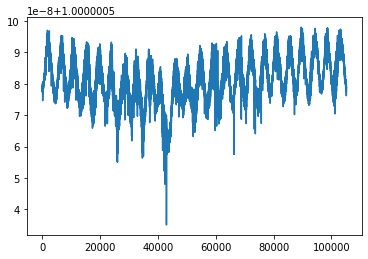

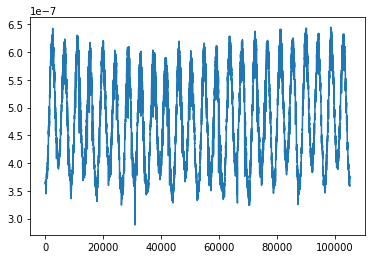

In [23]:
plt.figure()
plt.plot(final[:,0])

plt.figure()
plt.plot(xdata[:,0])

print(np.sum(np.square(final-xdata[1:,]))/(final.shape[0]*final.shape[1]))

(105191, 17280)


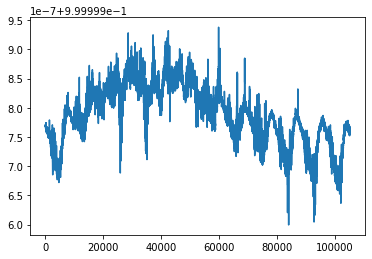

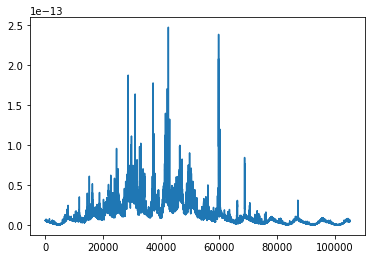

In [25]:
plt.figure()
plt.plot(final[:,17279])

plt.figure()
plt.plot(xdata[:,17279])

## ignore below for combined


In [51]:
"""Compress data using ROM method"""
r = 10

localSolarTimes = np.linspace(0,24,24)
latitudes = np.linspace(-87.5,87.5,20)
altitudes = np.linspace(100,800,36)
nofAlt = len(altitudes)
nofLst = len(localSolarTimes)
nofLat = len(latitudes)
#denseData = dens['densityData']
spacewData = full_sw['SWdataFullSmooth']
densityDataMeanLog = np.log10(np.mean(xdata, axis = 1))
densityDataMeanLog = np.reshape(densityDataMeanLog, (17280, 1))
densityDataVarLog = np.log10(denseData) - densityDataMeanLog
u,d,v = np.linalg.svd(densityDataVarLog)
densityDataLogVarROM = np.matmul(np.transpose(u[:,0:r]), densityDataVarLog)
startIndex = 0

X1 = densityDataLogVarROM[0:r, startIndex: -1]
X2 = densityDataLogVarROM[0:r, startIndex+1:]

# standard space weather inputs for the linear model
U1 = np.transpose(spacewData[startIndex:-1,:])
#print(U1.shape)
# add next timesteps for better prediction
U1 = np.append(U1,np.transpose(spacewData[startIndex+1:,10:11]), axis = 0)
#print(U1[14:15, 0:5])
U1 = np.append(U1,np.transpose(spacewData[startIndex+1:,2:3]), axis = 0)
U1 = np.append(U1,np.transpose(spacewData[startIndex+1:,4:5]), axis = 0)
U1 = np.append(U1,np.transpose(spacewData[startIndex+1:,6:7]), axis = 0)
U1 = np.append(U1,np.transpose(spacewData[startIndex+1:,8:9]), axis = 0)
#adding mixed terms
#rand = np.matmul(np.transpose(spacewData[startIndex:-1,10:11]),np.transpose(spacewData[startIndex:-1,2:3]))
#print(rand.shape)
U1 = np.append(U1,(np.multiply(np.transpose(spacewData[startIndex:-1,10:11]),np.transpose(spacewData[startIndex:-1,2:3]))), axis = 0)
U1 = np.append(U1,(np.multiply(np.transpose(spacewData[startIndex+1:,10:11]),np.transpose(spacewData[startIndex+1:,2:3]))), axis = 0)

#adding quadratic DSTDTC 
U1 = np.append(U1,np.transpose(np.square((spacewData[startIndex:-1,10:11]))), axis = 0)
U1 = np.append(U1,np.transpose(np.square((spacewData[startIndex+1:,10:11]))), axis = 0)

Om = np.append(X1, U1, axis = 0)
Phi = np.matmul(X2,np.linalg.pinv(Om))
A = Phi[:r, :r]
B = Phi[:r, r:]
a,b = np.linalg.eig(A)
XfullPred = np.matmul(A,X1) + np.matmul(B,U1)


In [52]:
Om = np.append(np.transpose(xdata), np.transpose(swtest), axis = 0)
X2 = np.transpose(ytest)

# Compute dynamic matrices:
# Phi = X2*pinv(Om)
Phi = np.matmul(X2,np.linalg.pinv(Om))

r = 10 #reduced order 
A = Phi[:r, :r]
B = Phi[:r, r:]

(105192, 10)


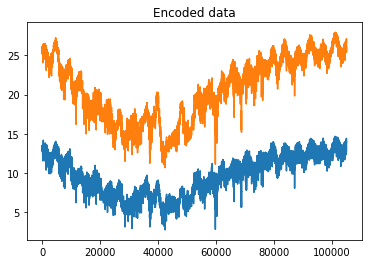

In [23]:
'''predicting encoded data for nnn model'''
rom_predict_cnn = encoder_model_cnn.predict(xmat)
plt.figure()
plt.title("Encoded data")
plt.plot(rom_predict_cnn[:,0])
plt.plot(rom_predict_cnn[:,9])

In [2]:
"""Creating NN Training Data for cnn model"""
#rom_predict = model_encoder.predict(xmat)
x_vals = rom_predict_cnn[:-1,]
x_vals = np.concatenate((x_vals, swtest), axis=1)
y_vals = rom_predict_cnn[1:,]
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.15)
x_t, x_val, y_t, y_val = train_test_split(x_train, y_train, test_size=0.17647)

NameError: name 'rom_predict_cnn' is not defined

In [ ]:
"retraining NN for cnn model "
model_cnn = Sequential()
model_cnn.add(Dense(80, kernel_initializer='random_uniform'))
model_cnn.add(LeakyReLU(alpha=0.3))
model_cnn.add(Dense(40, kernel_initializer='random_uniform'))
model_cnn.add(LeakyReLU(alpha=0.3))
model_cnn.add(Dense(20, kernel_initializer='random_uniform'))
model_cnn.add(LeakyReLU(alpha=0.3))
model_cnn.add(Dense(10, kernel_initializer='random_uniform'))
ad = optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_cnn.compile(optimizer=ad, loss='mse', metrics=['accuracy'])
history = model_cnn.fit(x = x_t, y = y_t, validation_data = (x_val, y_val), epochs = 500, batch_size = 32) #, callbacks=[early_stop])


In [ ]:
"""Use autoencoder for prediction and Decoder for cnn model"""
NN_data_cnn = x_vals
NN_predict_cnn = model.predict(NN_data_cnn)
final_predict_cnn = decoder_model_cnn.predict(NN_predict_cnn)

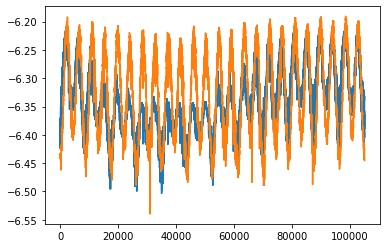

In [27]:
'''compare actual, nn autoencoder, and cnn autoencoder'''

final_predict = final_predict*np.std(xdata, keepdims=True) + np.mean(xdata, keepdims=True) 
#tens = np.full(final_predict_1.shape, 10)
#final = np.power(tens, final_predict)
plt.figure()
plt.plot(final_predict[:,0])
#plt.plot(final_predict_cnn[:,0])
plt.plot(xdata[:,0])

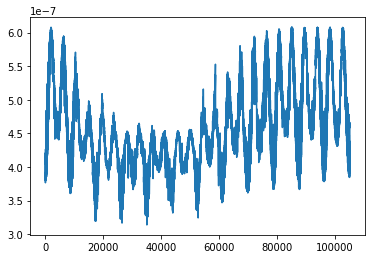

In [29]:
tens = np.full(final_predict.shape, 10)
final = np.power(tens, final_predict)
plt.figure()
plt.plot(final[:,0])

In [ ]:
#tens = np.full(final_predict.shape, 10)
final_x = np.power(tens, xdata[:-1])
plt.figure()
plt.plot(final[:,0])
plt.plot(final_x[:,0])

0.0017183655948858853


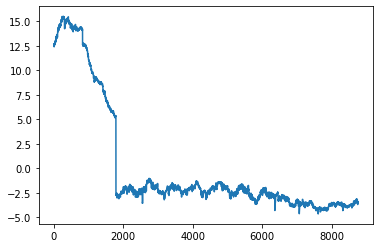

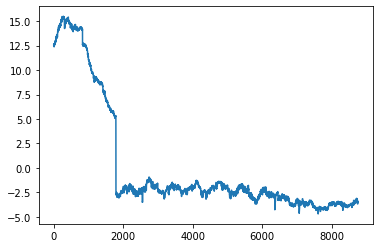

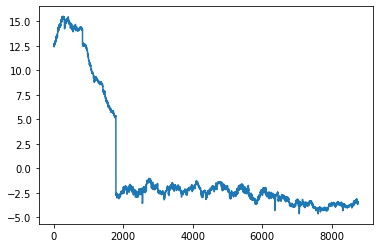

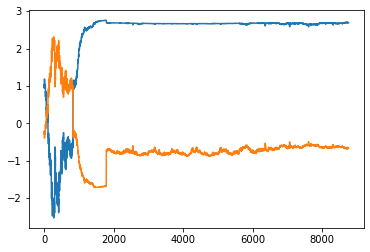

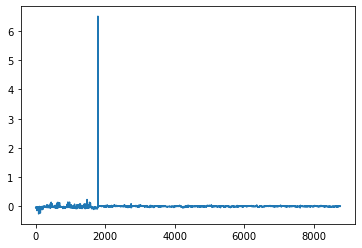

In [98]:
print(np.sum(np.square(NN_predict-y_vals))/(NN_predict.shape[0]*NN_predict.shape[1]))
plt.figure()
plt.plot(x_vals[:,0])

plt.figure()
plt.plot(NN_predict[:,0])

plt.figure()
plt.plot(y_vals[:,0])

plt.figure()
plt.plot(final_predict[:,0])
plt.plot(final_predict[:,17279])

plt.figure()
plt.plot((NN_predict-y_vals)[:,0])

In [99]:
predict_mean = np.mean(xdata, keepdims=True)

In [100]:
predict_sd = np.std(xdata, keepdims=True)

[1.0356922 1.031148  1.0275614 ... 2.6886902 2.690895  2.690906 ]
(1, 1)
(1, 1)
0.9635526210078099
[-8.905186  -8.920733  -8.933004  ... -3.2497177 -3.2421732 -3.242136 ]
[1.24398258e-09 1.20023572e-09 1.16679785e-09 ... 5.62706961e-04
 5.72567648e-04 5.72616685e-04]


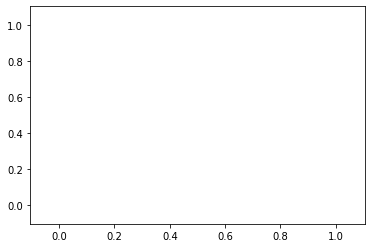

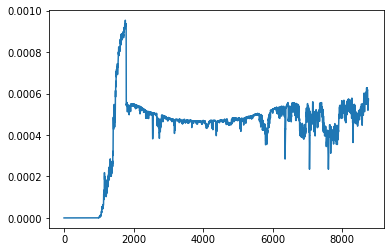

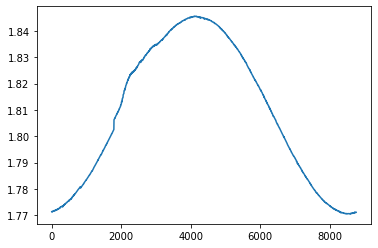

In [102]:
print(final_predict[:,0])
print(predict_mean.shape)
print(predict_sd.shape)
plt.figure()
plt.plot(final_predict[:0])
plt.plot(actual_predict[:0])

print(np.sum(np.square(final_predict-actual_predict))/(final_predict.shape[0]*final_predict.shape[1]))

final_predict_1 = final_predict*predict_sd + predict_mean
print(final_predict_1[:,0])
tens = np.full(final_predict_1.shape, 10)
final_predict_1 = np.power(tens, final_predict_1)
plt.figure()
print(final_predict_1[:,0])
plt.plot(final_predict_1[:,0])
plt.figure()
plt.plot(actual_predict[:,0])


(8759, 17280)
(17280, 105192)


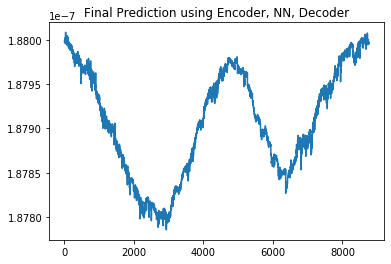

In [34]:
print(y_full.shape)
print(xdata.shape)
plt.figure()
plt.title("Final Prediction using Encoder, NN, Decoder")
plt.plot(y_full[:,0])

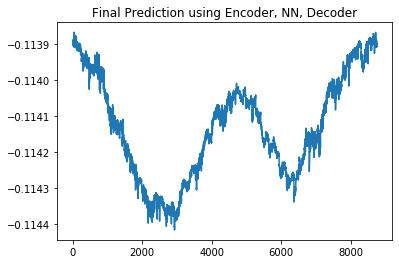

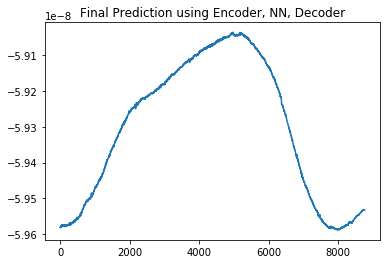

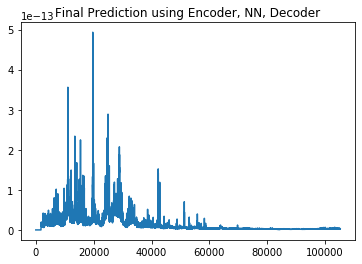

In [27]:
plt.figure()
plt.title("Final Prediction using Encoder, NN, Decoder")
index = int(17280/2)
plt.plot(final_predict[:,index])

y_full=(final_predict) * predict_sd + predict_mean
plt.figure()
plt.title("Final Prediction using Encoder, NN, Decoder")

index = int(17279)
plt.plot(y_full[:,index])

plt.figure()
plt.title("Final Prediction using Encoder, NN, Decoder")
index = int(17279)
plt.plot(xdata[index])

NameError: name 'final_predict_lin' is not defined

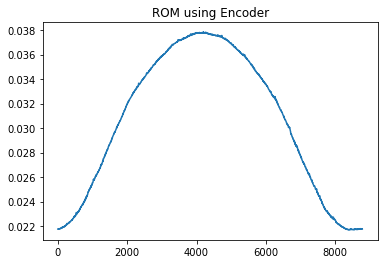

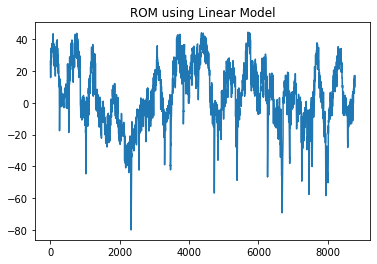

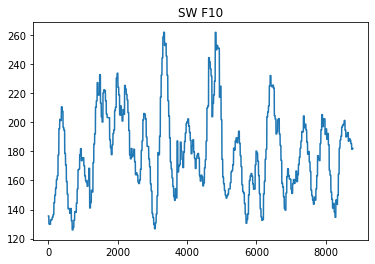

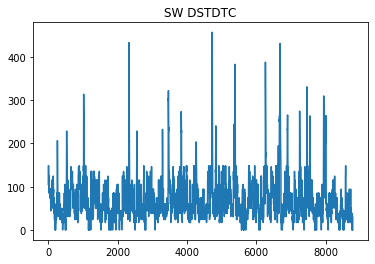

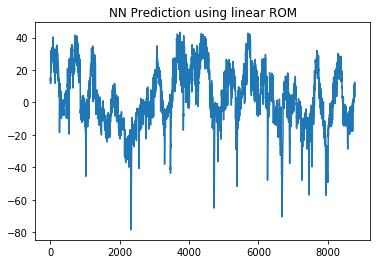

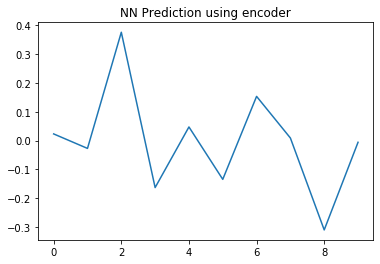

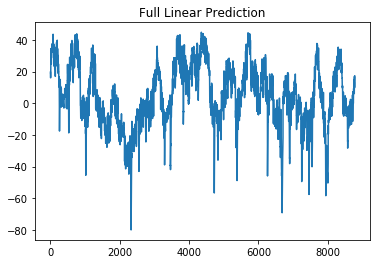

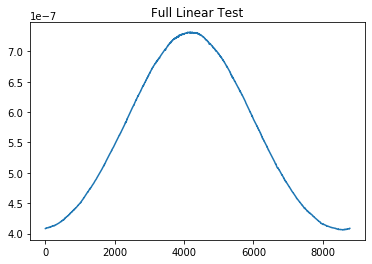

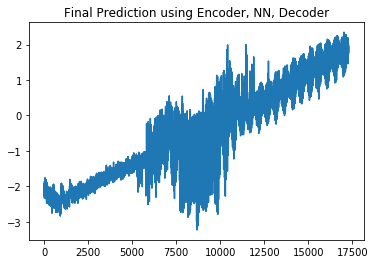

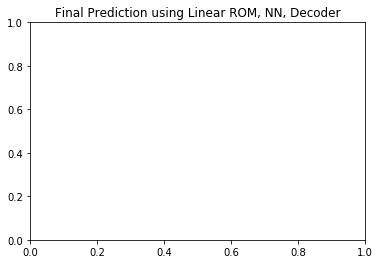

In [36]:
"""Graphs of Data"""

#Encoder
plt.figure()
plt.title("ROM using Encoder")
plt.plot(NN_data[:,0])
plt.figure()
plt.title("ROM using Linear Model")
plt.plot(Lin_NN_Data[:,0])
plt.figure()
plt.title("SW F10")
plt.plot(swtest[:,2])
plt.figure()
plt.title("SW DSTDTC")
plt.plot(swtest[:,10])

#NN
plt.figure()
plt.title("NN Prediction using linear ROM")
plt.plot(Lin_NN_predict[0])
plt.figure()
plt.title("NN Prediction using encoder")
plt.plot(NN_predict[0])
plt.figure()
plt.title("Full Linear Prediction")
plt.plot(XfullPred[0])
plt.figure()
plt.title("Full Linear Test")
plt.plot(actual_ROM[0])

#Decoder
plt.figure()
plt.title("Final Prediction using Encoder, NN, Decoder")
plt.plot(final_predict[0])
plt.figure()
plt.title("Final Prediction using Linear ROM, NN, Decoder")
plt.plot(final_predict_lin[0])
plt.figure()
plt.title("Final Prediction using Linear ROM, Linear Prediction, Decoder")
plt.plot(final_predict_lin[0])
plt.figure()
plt.title("Final Prediction using all Linear")
plt.plot(densityRomPred[0])

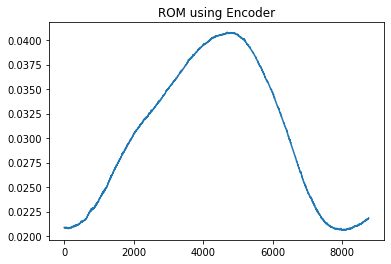

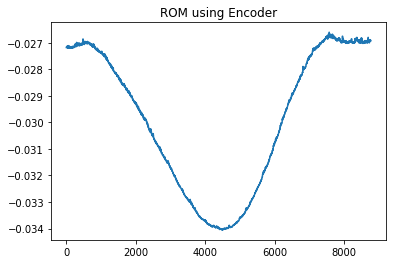

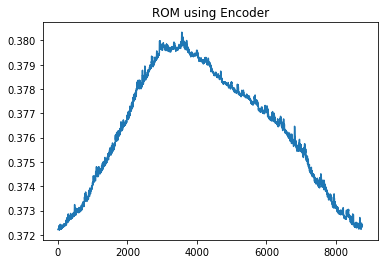

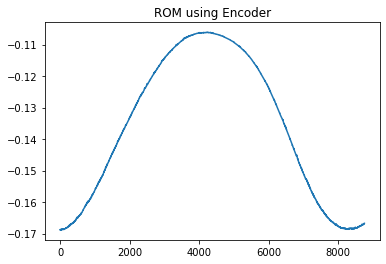

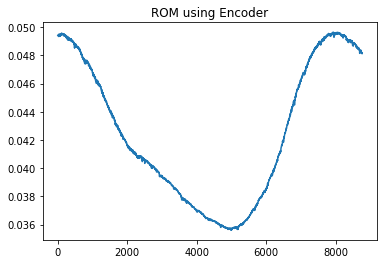

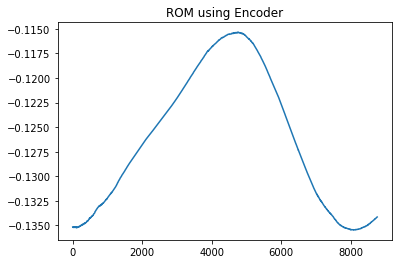

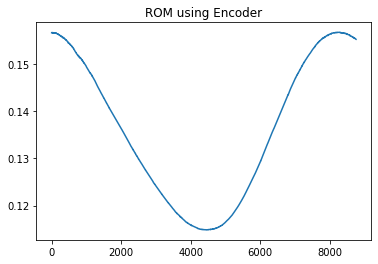

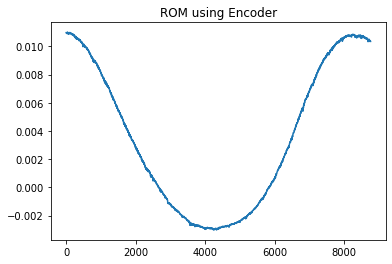

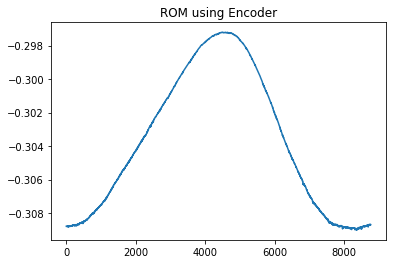

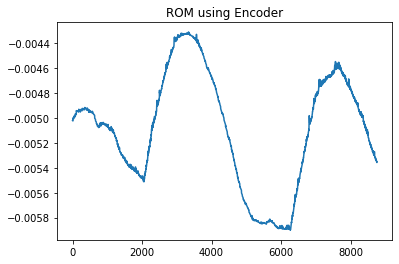

In [41]:
for i in range(10):
    plt.figure()
    plt.title("ROM using Encoder")
    plt.plot(NN_data[:,i])

In [43]:
print(final_predict[:10,1])
print(actual_predict[:10,1])
squared = np.sum(np.square(final_predict-actual_predict))/(final_predict.shape[0]*final_predict.shape[1])
percent_error = (final_predict-actual_predict)/actual_predict
rms_matrix = np.zeros(percent_error.shape[0])
for i in range(len(percent_error)):
    rms_matrix[i] = (np.sum(np.square(percent_error[i])))**(0.5)
print(np.mean(rms_matrix))
rms_percent = (np.sum(np.square(percent_error))/(percent_error.shape[0]*percent_error.shape[1]))**(1/2)
print(percent_error)
print(rms_percent)
print(squared)

[-0.95544744 -0.550004   -0.549598   -0.6550026  -0.5610564  -0.56062984
 -0.560204   -0.5597758  -0.5593498  -0.71144557]
[4.301458  4.301596  4.3017354 4.301141  4.3012815 4.3014226 4.3015647
 4.3017073 4.3018503 4.302729 ]
723.3504681116718
[[-1.1926072 -1.2221218 -1.2035104 ... -3.8083432 -3.9982257 -3.6433992]
 [-1.1099892 -1.1278604 -1.1198654 ... -1.0352243 -1.0389681 -1.0214396]
 [-1.109891  -1.127762  -1.1197665 ... -1.0344075 -1.0380414 -1.0206556]
 ...
 [-1.0883416 -1.1071318 -1.0986391 ... -1.2387276 -1.2668854 -1.2322637]
 [-1.2104287 -1.2261246 -1.2230039 ... -3.1584153 -3.099397  -3.0840597]
 [-1.0827692 -1.1014513 -1.0929168 ... -1.2018687 -1.233254  -1.1965947]]
5.888340467377545
1.824873176717649


In [27]:
"""Compare errors between the final prediction and the actual data for all these years """

#XfullPred = XfullPred.T
#print(XfullPred.shape)
error_Lin_NN = 0
error_CNN_NN = 0

print(Lin_NN_predict.shape)
for i in range(len(XfullPred)):
    for j in range(len(XfullPred[0])):
        error_Lin_NN += (Lin_NN_predict[i][j] - NN_predict[i][j])**2
        error_CNN_NN += (XfullPred[i][j] - NN_predict[i][j])**2
error_Lin_NN = error_Lin_NN /(XfullPred.shape[0]*XfullPred.shape[1])
error_CNN_NN = error_CNN_NN /(XfullPred.shape[0]*XfullPred.shape[1])
print(error_Lin_NN)
print(error_CNN_NN)


        

(8783, 10)
80.29831358326653
80.92667468059855
